# Počítačový návrh léčiv, 4. cvičení
Jiří Reiniš

"na tomto cviceni si budeme hrat s fingerprinty/patterny a jejich hashovanim"

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw

In [2]:
suppl = Chem.SDMolSupplier("../../data/drugbank.sdf")
drugbank = [m for m in suppl if m]

jak to funguje:
1. postupne udelame patterny, ktery jsou v dany molekule
2. prekodujou se na cisla
3. cisla se zahashujou


In [3]:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=512) for m in drugbank]

In [4]:
len(morgan_fps), morgan_fps[0:10]

(7110,
  <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x7faa8f6c03f0>])

In [5]:
set(morgan_fps[666].GetOnBits())

{1,
 3,
 13,
 22,
 33,
 56,
 64,
 80,
 113,
 116,
 138,
 144,
 147,
 165,
 175,
 183,
 214,
 235,
 247,
 252,
 274,
 283,
 295,
 316,
 321,
 337,
 356,
 369,
 371,
 381,
 401,
 412,
 414,
 428,
 440,
 441,
 456,
 457,
 507}

"nevyhodou fingerprintu je nemoznost primocare jednoduche interpretace"

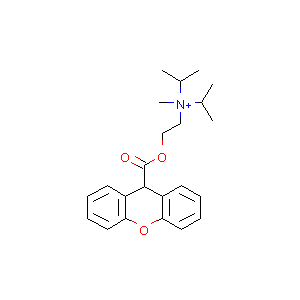

In [6]:
Draw.MolToImage(drugbank[666])

In [7]:
devil_fp = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=256)
len(devil_fp.GetOnBits())

38

In [8]:
devil_fp = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=512)
len(devil_fp.GetOnBits())

39

In [9]:
devil_fp = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=1024)
len(devil_fp.GetOnBits())

39

In [10]:
devil_fp = Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=2048)
len(devil_fp.GetOnBits())

39

Nyni se podivame, jak huste jsou zaplnene bity, kdyz ruzne menime parametry hashovani a vyberu fingerprintu

In [13]:
morgan_fps_2_256  = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=256) for m in drugbank]
morgan_fps_2_512  = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=512) for m in drugbank]
morgan_fps_2_1024 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]
morgan_fps_2_2048 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in drugbank]
morgan_fps_3_256  = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=256) for m in drugbank]
morgan_fps_3_512  = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=512) for m in drugbank]
morgan_fps_3_1024 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=1024) for m in drugbank]
morgan_fps_3_2048 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=2048) for m in drugbank]

In [14]:
def fingerprint_density(fps):
    sum_on_bit_density = sum((len(fp.GetOnBits()) / fp.GetNumBits() for fp in fps))
    average_on_bit_density = sum_on_bit_density / len(fps)
    return average_on_bit_density

In [15]:
densities = [fingerprint_density(fps) for fps in (morgan_fps_2_256, morgan_fps_2_512, morgan_fps_2_1024, morgan_fps_2_2048,
                                                  morgan_fps_3_256, morgan_fps_3_512, morgan_fps_3_1024, morgan_fps_3_2048)]

In [16]:
avg_on_bits = [x * y for x, y in zip(densities, (256, 512, 1024, 2048, 256, 512, 1024, 2048))]

In [17]:
avg_on_bits

[37.31870604781997,
 38.8943741209564,
 39.7985935302391,
 40.2760900140647,
 48.55133614627285,
 51.54992967651196,
 53.21701828410689,
 54.10450070323488]

In [ ]:
[0,2,3]*2

#### Nyni si vysvetlime fingerprinty na jedne molekule

In [21]:
bitinfo = {}
Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits=512, bitInfo=bitinfo)
bitinfo

{1: ((4, 0), (5, 0)),
 3: ((15, 1), (16, 1)),
 13: ((12, 1),),
 22: ((14, 1),),
 33: ((7, 0), (8, 0), (9, 0), (10, 0), (11, 0)),
 56: ((14, 2),),
 64: ((23, 1), (25, 1), (24, 1), (26, 1)),
 80: ((6, 0), (12, 0)),
 113: ((3, 2),),
 116: ((7, 1),),
 138: ((2, 0),),
 144: ((1, 0),),
 147: ((0, 1),),
 165: ((17, 2), (18, 2)),
 175: ((23, 2), (25, 2), (24, 2), (26, 2)),
 183: ((0, 0),),
 214: ((19, 1), (20, 1), (21, 1), (22, 1)),
 235: ((13, 1),),
 247: ((1, 2),),
 252: ((0, 2),),
 274: ((1, 1),),
 283: ((8, 1), (9, 1), (10, 1), (11, 1)),
 295: ((14, 0),),
 316: ((13, 2),),
 321: ((6, 2),),
 337: ((19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0)),
 356: ((15, 0), (16, 0), (17, 0), (18, 0)),
 369: ((17, 1), (18, 1)),
 371: ((19, 2), (20, 2)),
 381: ((2, 1),),
 401: ((6, 1),),
 412: ((3, 1),),
 414: ((3, 0),),
 428: ((12, 2),),
 440: ((4, 2), (5, 2)),
 441: ((15, 2), (16, 2)),
 456: ((4, 1), (5, 1)),
 457: ((21, 2), (22, 2)),
 507: ((13, 0),)}

In [23]:
def bit2smiles(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512, bitInfo=bitinfo)
    fragments = set()
    for hit, radius in bitinfo.get(bit, []):
        if radius > 0:
            hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, hit)
            submol = Chem.PathToSubmol(mol, hit_atoms)
            fragment_smiles = Chem.MolToSmiles(submol)
        else:
            fragment_smiles = mol.GetAtomWithIdx(hit).GetSymbol()
        fragments.add(fragment_smiles)
    return fragments

In [28]:
print(bit2smiles(drugbank[666], 428))
print(bit2smiles(drugbank[666], 337))
print(bit2smiles(drugbank[666], 412))


{'COCC[NH3+]'}
{'C'}
{'C[N+](C)(C)C'}


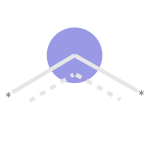

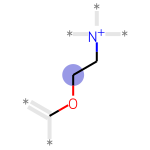

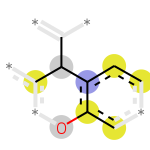

In [34]:
from rdkit.Chem.Draw import IPythonConsole
display(Draw.DrawMorganBit(drugbank[666], 337, bitinfo))
display(Draw.DrawMorganBit(drugbank[666], 428, bitinfo))
display(Draw.DrawMorganBit(drugbank[666], 441, bitinfo))

Ted si budeme hrat s Tanimoto distance

In [35]:
morgan_fps = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]

In [36]:
def tanimoto_similarity(fp1, fp2):
    fp1_on_bits = set(fp1.GetOnBits())
    fp2_on_bits = set(fp2.GetOnBits())
    all_bits = fp1_on_bits.union(fp2_on_bits)
    shared_bits = fp1_on_bits.intersection(fp2_on_bits)
    if not all_bits:
        raise ValueError('nope')
    return len(shared_bits) / len(all_bits)

In [37]:
tanimoto_similarity(morgan_fps[0],morgan_fps[666])

0.14516129032258066